# Motivation
Facing the classification problem, we will choose a classification model such as Logistic Regression, decision tree for analysis, or use some common machine learning frameworks such as XGboost, LightGBM and so on. The goal this time is to try some deep learning techniques as an exercise reference, the Autocoder mentioned in the title of this kernel. I will use Autocoder to build the classifier and use F1 score as the criterion for selecting the classification threshold.

## Importing Libraries

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.python.client import device_lib
import time
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc

In [2]:
tf.__version__

'2.1.0-rc0'

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6754347109414939339
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7270169880941885791
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7770405240279050031
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15868500378
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4023070350392305828
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [3]:
tf.test.is_gpu_available(
    cuda_only = False,
    min_cuda_compute_capability = None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# Importing dataset

In [4]:
# Importing dataset
dataset = pd.read_csv('creditcard.csv')
dataset_X = dataset.iloc[:, 0:30]
dataset_y = dataset.iloc[:, 30]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

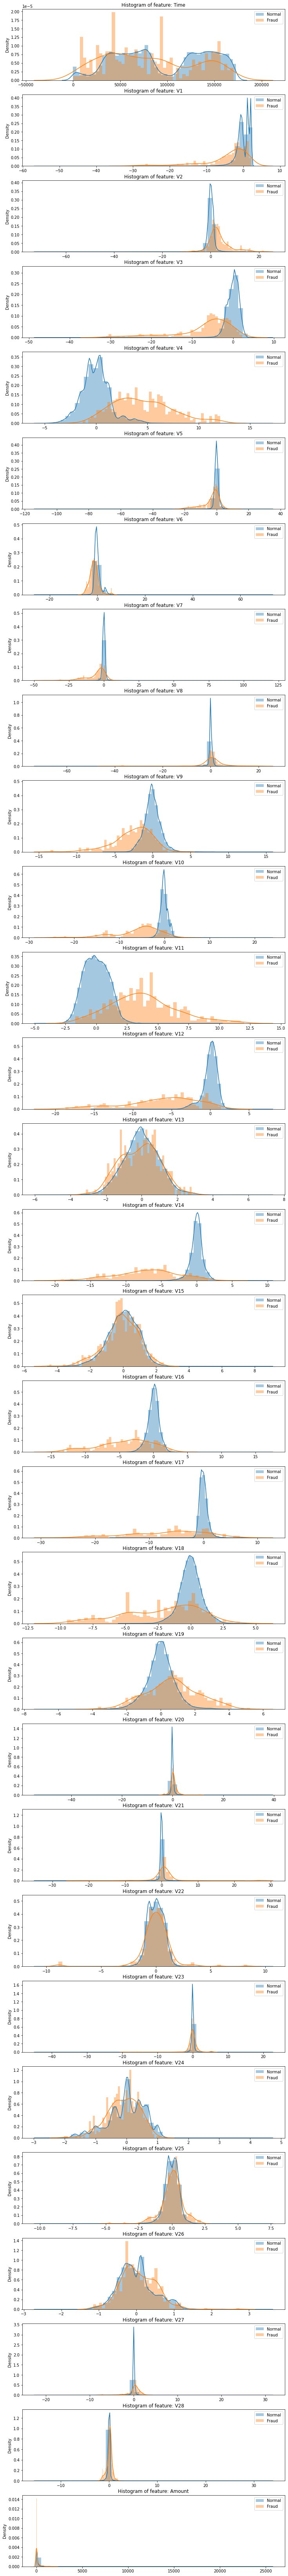

In [9]:
# Select the features.
v_features = dataset.iloc[:, 0:30].columns

plt.figure(figsize = (12, 120))
gs = gridspec.GridSpec(30, 1)
for i, cn in enumerate(dataset[v_features]):
    ax = plt.subplot(gs[i])    
    sns.distplot(dataset[cn][dataset.Class == 0], bins = 50, label = 'Normal')
    sns.distplot(dataset[cn][dataset.Class == 1], bins = 50, label = 'Fraud')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(cn))
    plt.legend()
plt.show()

In [10]:
X = dataset_X.iloc[:, 1:].values # Drop 'Time'
y = dataset_y.values

## Splitting the dataset into the training set(70%) and test set(30%)

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [12]:
# Feature Scaling: Only scale 'Amount'
sc = StandardScaler()
X_train[:, -1:] = sc.fit_transform(X_train[:, -1:])
X_test[:, -1:] = sc.transform(X_test[:, -1:])

In [13]:
X_train.shape

(199364, 29)

# Auto Encoders


## Building the AE model
Input: 29 -> encode: 100 -> latent -> decode: 100 -> Output: 29.

In [15]:
class MyModel(tf.keras.Model):
    def __init__(self, latent_dim):
        super(MyModel, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape = (29, ), name = 'InputLayer'), 
                tf.keras.layers.Dense(100, kernel_initializer = 'uniform', activation = 'tanh', name = 'Encoder_1'), 
                tf.keras.layers.Dense(latent_dim, kernel_initializer = 'uniform', activation = 'tanh', name = 'Laten_Space')          
            ], 
            name = 'Encoder'
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape = (latent_dim, )), 
                tf.keras.layers.Dense(100, kernel_initializer = 'uniform', activation = 'tanh'), 
                tf.keras.layers.Dense(29, kernel_initializer = 'uniform', activation = 'linear')
            ],
            name = 'Decoder'
        )
        self.AE_model = tf.keras.Model(inputs = self.encoder.input, 
                                       outputs = self.decoder(self.encoder.output), 
                                       name = 'Auto Encoder')
                
    def call(self, input_tensor):
        latent_space = self.encoder.output
        reconstruction = self.decoder(latent_space)
        AE_model = tf.keras.Model(inputs = self.encoder.input, outputs = reconstruction)        
        return AE_model(input_tensor) 
    
    def summary(self):
        return self.AE_model.summary()

In [16]:
model = MyModel(50)
model.summary()

Model: "Auto Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 29)]              0         
_________________________________________________________________
Encoder_1 (Dense)            (None, 100)               3000      
_________________________________________________________________
Laten_Space (Dense)          (None, 50)                5050      
_________________________________________________________________
Decoder (Sequential)         (None, 29)                8029      
Total params: 16,079
Trainable params: 16,079
Non-trainable params: 0
_________________________________________________________________


## Fitting to the training set
We train only the normal data set to expect that the abnormal sample will not be easily restored, so that the mse will be larger than expected.

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', experimental_run_tf_function = False)
tStart = time.time()
h = model.fit(X_train[y_train == 0, :], X_train[y_train == 0, :], 
              validation_data = (X_test[y_test == 0, :], X_test[y_test == 0, :]), 
              batch_size = 256, epochs = 10, verbose = 1)
tEnd = time.time()
print('It cost %0.2f seconds.' % (tEnd - tStart))

Train on 198980 samples, validate on 85335 samples
Epoch 1/10
198980/198980 [==============================] - 4s 18us/sample - loss: 0.2285 - val_loss: 0.0973
Epoch 2/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0557 - val_loss: 0.0578
Epoch 3/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0338 - val_loss: 0.0454
Epoch 4/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0243 - val_loss: 0.0587
Epoch 5/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0197 - val_loss: 0.0343
Epoch 6/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0167 - val_loss: 0.0301
Epoch 7/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0139 - val_loss: 0.0280
Epoch 8/10
198980/198980 [==============================] - 3s 13us/sample - loss: 0.0123 - val_loss: 0.0255
Epoch 9/10
198980/198980 [==============================] - 3s 13us/sample - 

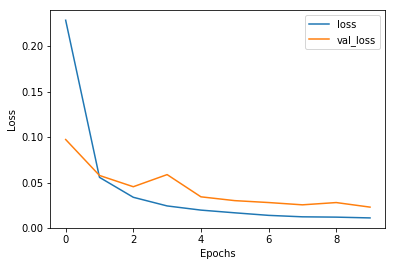

In [18]:
plt.figure()
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the MSE

In [15]:
X_train

array([[-1.35980713, -0.07278117,  2.53634674, ...,  0.13355838,
        -0.02105305,  0.24044256],
       [ 1.19185711,  0.26615071,  0.16648011, ..., -0.0089831 ,
         0.01472417, -0.34984872],
       [-1.35835406, -1.34016307,  1.77320934, ..., -0.05535279,
        -0.05975184,  1.16061076],
       ...,
       [-0.63848877,  0.05702875,  1.02211992, ...,  0.0723008 ,
         0.10024377, -0.2722708 ],
       [-1.38358975, -5.63235443, -4.63721701, ..., -0.41284618,
         0.19635614,  6.65148873],
       [-1.59031251,  1.18583424,  0.92971615, ..., -0.10908612,
        -0.12638544, -0.19879072]])

In [19]:
# Training set
train_mse = np.mean(np.power(model(X_train) - X_train, 2), axis = 1)
train_error = pd.DataFrame({'Reconstruction_error': train_mse, 
                            'True_class': y_train})

In [20]:
train_error.describe()

,Reconstruction_error,True_class
count,199364.000000,199364.000000
mean,0.018125,0.001926
std,0.667714,0.043845
min,0.000051,0.000000
25%,0.000410,0.000000
50%,0.000686,0.000000
75%,0.001297,0.000000
max,126.906265,1.000000


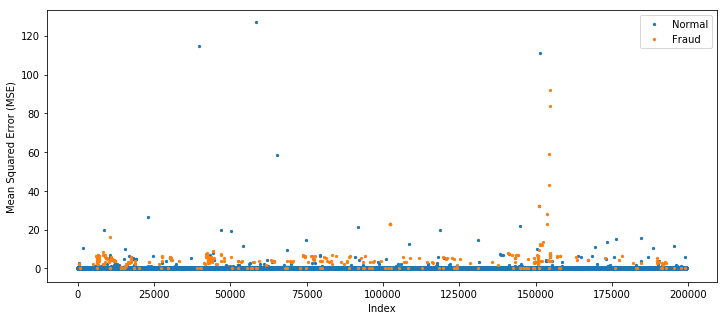

In [21]:
plt.figure(figsize = (12, 5))
plt.scatter(train_error.index[train_error['True_class'] == 0], 
            train_error[train_error['True_class'] == 0]['Reconstruction_error'], 
            s = 5, label = 'Normal')
plt.scatter(train_error.index[train_error['True_class'] == 1], 
            train_error[train_error['True_class'] == 1]['Reconstruction_error'], 
            s = 5, label = 'Fraud')
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Determine the threshold to optimize F1 score

In [22]:
# Plotting the precision recall curve.
precision, recall, threshold = precision_recall_curve(train_error.True_class, train_error.Reconstruction_error)
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_error.True_class, train_error.Reconstruction_error)

# Choosing the threshold to maximize the F1 score
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


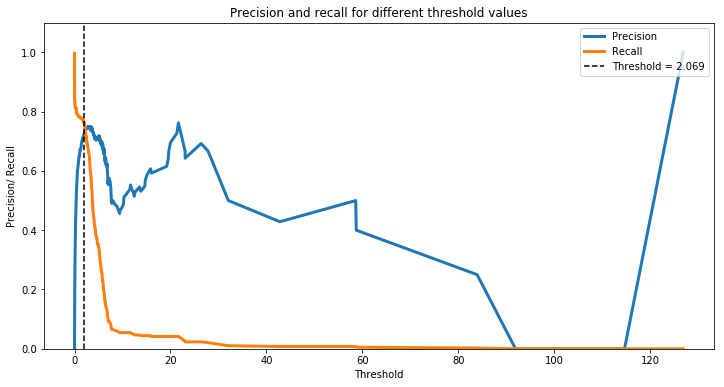

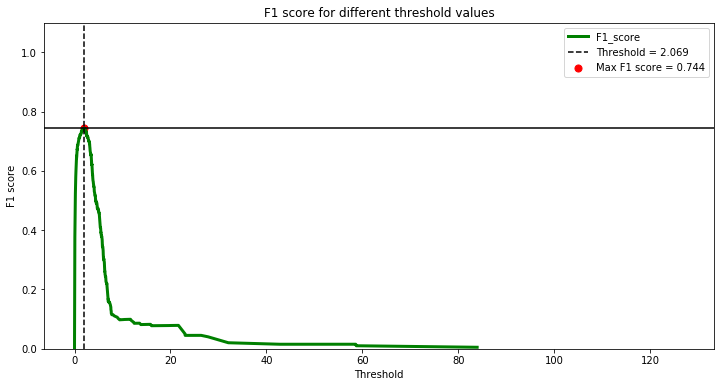

Best threshold = 2.068838
Max F1 score = 0.743949


In [23]:
## Precision, Recall curve 
plt.figure(figsize = (12, 6))
plt.plot(threshold, precision[1: ], label = "Precision", linewidth = 3)
plt.plot(threshold, recall[1: ], label ="Recall", linewidth = 3)
plt.axvline(best_threshold, color = 'black', ls = '--', label = 'Threshold = %0.3f' % (best_threshold))
plt.ylim(0, 1.1)
plt.xlabel('Threshold')
plt.ylabel('Precision/ Recall')
plt.title('Precision and recall for different threshold values')
plt.legend(loc = 'upper right')

## F1 score curve
plt.figure(figsize = (12, 6))
plt.plot(threshold, f1_score[1: ], label = "F1_score", linewidth = 3, color = 'green')
plt.scatter(threshold[f1_score[1: ] == max_f1], max_f1, label = 'Max F1 score = %0.3f' % (max_f1), s = 50, color = 'red')
plt.axvline(best_threshold, color = 'black', ls = '--', label = 'Threshold = %0.3f' % (best_threshold))
plt.axhline(max_f1, color = 'black', ls = '-')
plt.ylim(0, 1.1)
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score for different threshold values')
plt.legend(loc = 'upper right')

plt.show()
print('Best threshold = %f' % (best_threshold))
print('Max F1 score = %f' % (max_f1))

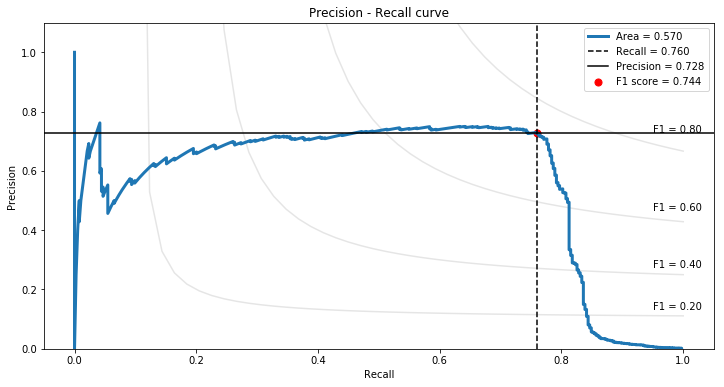

In [24]:
## Recall - Precision curve
plt.figure(figsize = (12, 6))
f_scores = np.linspace(0.2, 0.8, num = 4)

for f_score in f_scores:
    x = np.linspace(0.001, 1)
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color = 'gray', alpha = 0.2)
    plt.annotate('F1 = {0:0.2f}'.format(f_score), xy = (0.95, y[45] + 0.02))

plt.plot(recall[1: ], precision[1: ], label = 'Area = %0.3f' % (average_precision), linewidth = 3)
plt.scatter(recall[f1_score == max_f1], precision[f1_score == max_f1], label = 'F1 score = %0.3f' % (max_f1), s = 50, color = 'red')
plt.axvline(recall[f1_score == max_f1], color = 'black', ls = '--', label = 'Recall = %0.3f' % (recall[f1_score == max_f1]))
plt.axhline(precision[f1_score == max_f1], color = 'black', ls = '-', label = 'Precision = %0.3f' % (precision[f1_score == max_f1]))
plt.ylim(0, 1.1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.legend(loc = 'upper right')

plt.show()

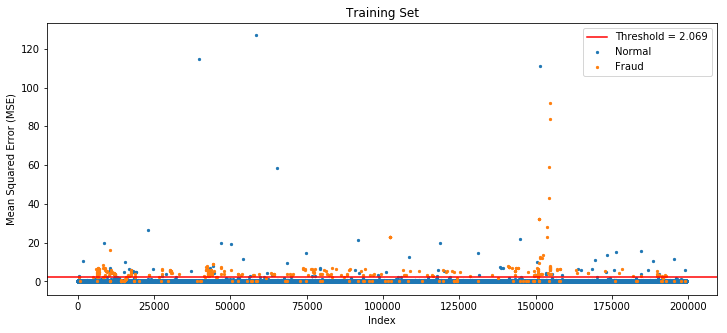

Best threshold = 2.068838


In [25]:
## Training Set
plt.figure(figsize = (12, 5))
plt.scatter(train_error.index[train_error['True_class'] == 0], 
            train_error[train_error['True_class'] == 0]['Reconstruction_error'], 
            s = 5, label = 'Normal')
plt.scatter(train_error.index[train_error['True_class'] == 1], 
            train_error[train_error['True_class'] == 1]['Reconstruction_error'], 
            s = 5, label = 'Fraud')
plt.axhline(best_threshold, color = 'red', label = 'Threshold = %0.3f' % (best_threshold))
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Set')
plt.legend()
plt.show()
print('Best threshold = %f' % (best_threshold))

## AutoEncoder Classifier
Rule: if mse > threshold, then belongs to 1, otherwise 0.

In [26]:
# Create AE predictor
def AE_predictor(X, model, threshold):
    X_valid = model(X)
    mse = np.mean(np.power(X_valid - X, 2), axis = 1)
    y = np.zeros(shape = mse.shape)
    y[mse > threshold] = 1
    return y

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.57      0.66      0.61       108

    accuracy                           1.00     85443
   macro avg       0.79      0.83      0.81     85443
weighted avg       1.00      1.00      1.00     85443



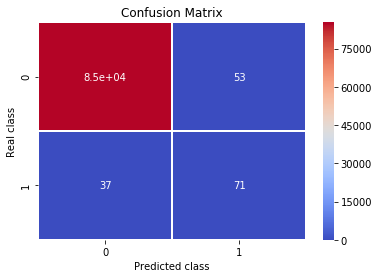

In [27]:
y_pred = AE_predictor(X = X_test, model = model, threshold = best_threshold)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(cm, cmap = "coolwarm", annot = True, linewidths = 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Real class")
plt.show()

# ROC curve

In [28]:
fpr, tpr, thresholds = roc_curve(train_error.True_class, train_error.Reconstruction_error)
roc_auc = auc(fpr, tpr)

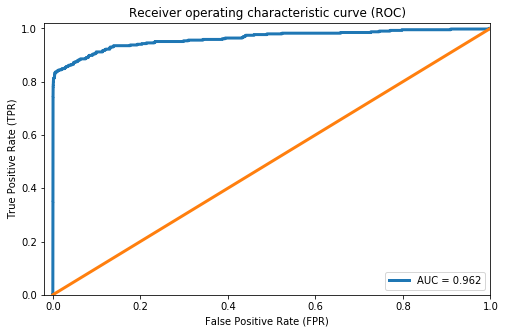

In [29]:
## ROC curve
plt.figure(figsize = (8, 5))
plt.plot(fpr, tpr, linewidth = 3, label = 'AUC = %0.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linewidth = 3)
plt.xlim(left = -0.02, right = 1)
plt.ylim(bottom = 0, top = 1.02)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic curve (ROC)')
plt.legend()
plt.show()